

# <font color = 'Green'> FIA - Pós-Graduação em Ciência de Dados </font>
## <font color = 'Green'> TCC - Rafael Nascimento</font>

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




## Parte 1:  Análise exploratória de dados



In [3]:
# Importação dos pacotes

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importação dos Excel
 
df_tcc = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FIA/TCC/RafaelN_TCC.xlsx')

In [5]:
# Verificação do número de linhas e colunas do dataframe df_tcc

df_tcc.shape
print(f'A base df_tcc tem {df_tcc.shape[0]} linhas e {df_tcc.shape[1]} colunas.')

A base df_tcc tem 2240 linhas e 29 colunas.


Uma vez verificado que os Property ID na base `df_airdna_extended` são únicos, conclui-se que a cardinalidade entre a `df_airdna_extended` e a `df_airdna` é de um para muitos.

In [6]:
# Visualizando uma amostra da df_tcc

df_tcc.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
# Visualizando as features e target da df_tcc

df_tcc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
# Verificando em quais colunas da df_tcc existem dados faltantes

[col for col in df_tcc.columns if df_tcc[col].isnull().sum() > 0]

['Income']

In [9]:
# Verificando em quantas linhas da feature 'Income' da existem dados faltantes

df_tcc['Income'].isnull().sum()

24

In [10]:
df_tcc['Age'] = 2020 - df_tcc['Year_Birth'] 

In [11]:
df_tcc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64


In [12]:
df_tcc = (
    df_tcc
    .assign(Year_Customer = df_tcc['Dt_Customer'].dt.year))

In [13]:
df_tcc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
df_tcc['Time_Customer'] = 2020 - df_tcc['Year_Customer'] 

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (23, 7))


df_tcc['Year_Birth'].hist(bins = 20, alpha = 0.5, 
                                            grid = False, edgecolor = 'white', linewidth = 1, ax = ax, density = True)

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 7))

colors = '#02BAB1'

df_tcc[['NumWebPurchases','NumWebVisitsMonth']].hist(bins = 12, alpha = 0.5, color = colors,
                                            grid = False, edgecolor = 'white', linewidth = 1, ax = [ax1, ax2], density = True)

ax1.set_ylabel('Frequency', fontsize = 16)
ax2.set_ylabel('Frequency', fontsize = 16)

ax1.set_title(fontsize = 18)
ax2.set_title(fontsize = 18)

In [ ]:
ax1.set_xlabel('Target', fontsize = 16)
ax2.set_xlabel('Target', fontsize = 16)


for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 14, padding = 0, fmt = '%.0f%%')

In [ ]:
# Medidas de posição

df_tcc[[col for col in df_tcc.columns if col not in cat_vars + key_vars]].describe().iloc[:,12:]

In [ ]:
# Correlograma

plt.subplots(figsize=(18, 8))
sns.heatmap(df_tcc[[col for col in df_tcc.columns if col not in cat_vars + key_vars]].corr().round(2), annot = True)

In [ ]:
# Instalando o pandas profiling

!pip install pandas-profiling==2.7.1 

In [ ]:
# Importando o pandas profiling

from pandas_profiling import ProfileReport

In [ ]:
# Criando o profile

profile = ProfileReport(df_tcc, title = 'Dataframe Profile Report')

In [ ]:
%whos

In [ ]:
# Utilize o comando profile para visualizar o relatório que foi gerado

profile

In [ ]:
df_null = df_tcc[df_tcc['Income'].isnull()]
df_null.shape

In [ ]:
df_null['Response'].sum()

In [ ]:
df_null

In [ ]:
df_tcc.boxplot(column = 'Income', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'NumWebVisitsMonth', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'NumWebPurchases', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'NumStorePurchases', by = 'Response', grid = True)

In [ ]:
plt.rcParams['figure.figsize'] = 23, 7
df_tcc.boxplot(column = 'Income', by = 'Education', grid = True)

In [ ]:
plt.rcParams['figure.figsize'] = 23, 7
df_tcc.boxplot(column = 'Income', by = 'Response', grid = True)

from matplotlib import cm

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 7))


df_tcc.boxplot(column = 'Income', by = 'Education', grid = True, ax = ax1, fontsize = 14)
df_tcc.boxplot(column = 'Income', by = 'Response', grid = True, ax = ax2, fontsize = 14)

ax1.set_xlabel('Education', fontsize = 16)
ax2.set_xlabel('Target', fontsize = 16)

ax1.set_ylabel('Yearly Income (MU)', fontsize = 16)
ax2.set_ylabel('Yearly Income (MU)', fontsize = 16)

ax1.set_title('Income x Education', fontsize = 18)
ax2.set_title('Income x Target', fontsize = 18)

In [ ]:
df_tcc.boxplot(column = 'NumWebPurchases', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'NumDealsPurchases', by = 'Response', grid = True)

In [ ]:

from matplotlib import cm

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 7))


df_tcc.boxplot(column = ['MntMeatProducts', 'MntWines'], by = 'Response', grid = True, ax = [ax1, ax2], fontsize = 14)

ax1.set_xlabel('Target', fontsize = 16)
ax2.set_xlabel('Target', fontsize = 16)

ax1.set_ylabel('Amount spent in the last 2 years (MU)', fontsize = 16)
ax2.set_ylabel('Amount spent in the last 2 years (MU)', fontsize = 16)

ax1.set_title('Meat Products x Target', fontsize = 18)
ax2.set_title('Wines x Target', fontsize = 18)


In [ ]:
df_tcc.boxplot(column = 'MntSweetProducts', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'MntFruits', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'MntWines', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column = 'MntGoldProds', by = 'Response', grid = True)

In [ ]:
df_tcc.boxplot(column='Income', by='Education', grid=False)

In [ ]:
df_tcc[cat_vars].columns

In [ ]:
df_tcc['Education'].value_counts(), df_tcc['Marital_Status'].value_counts()

# Dados qualitativos



## Quantas e quais são as variáveis categóricas do dataframe df_tcc?

In [ ]:
# Identificando as variáveis categóricas do dataframe df_tcc

qtd_varcat = len(df_tcc[cat_vars].columns)

varcat1 = df_tcc[cat_vars].columns[0]
varcat2 = df_tcc[cat_vars].columns[1]

print(f'O dataframe df_tcc possui {qtd_varcat} variáveis categóricas. Estas variáveis categóricas são: {varcat1} e {varcat2}.')

## Análise univariada

In [ ]:
# Gráficos de barras com a frequência relativa da variável Education

from matplotlib import cm

df = df_tcc['Education'].value_counts(normalize = 'index')*100

plt.rcParams['figure.figsize'] = 23, 7
cs = cm.tab20(np.arange(100))

graph = df.plot.bar(rot = 0, fontsize = 14, width = 0.5, color = cs )
plt.title('Education', fontsize = 18)
plt.ylabel('Frequency (%)', fontsize = 16)

for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 14, padding = 0, fmt = '%.0f%%')

In [ ]:
# Gráficos de barras com a frequência relativa da variável Marital_Status

from matplotlib import cm

df = df_tcc['Marital_Status'].value_counts(normalize = 'index')*100

plt.rcParams['figure.figsize'] = 23, 7
cs = cm.tab20(np.arange(100))

graph = df.plot.bar(rot = 0, fontsize = 14, width = 0.5, color = cs )
plt.title('Marital Status', fontsize = 18)
plt.ylabel('Frequency (%)', fontsize = 16)


for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 14, padding = 0, fmt = '%.1f%%')

## Análise bivariada

In [ ]:
# Gráficos de barras com a frequência relativa da variável Marital_Status

from matplotlib import cm

df = pd.crosstab(df_tcc['Education'], df_tcc['Response'], normalize = 'index')*100
df = df.reindex(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

plt.rcParams['figure.figsize'] = 23, 7
colors = ['#02BAB1', '#DDDDDD']
cs = cm.tab20(np.arange(100))

graph = df.plot.bar(stacked = True, rot = 0, fontsize = 14, width = 0.5, color = colors)
plt.title('Target x Education', fontsize = 18)
plt.ylabel('Frequency (%)', fontsize = 16)
plt.legend(loc = "lower right")

for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 14, padding = 0, fmt = '%.0f%%')

In [ ]:
# Gráficos de barras com a frequência relativa da variável Marital_Status


df = pd.crosstab(df_tcc['Marital_Status'], df_tcc['Response'], normalize = 'index')*100
df = df.reindex(['Together','Married','Divorced','Single','Widow','Alone','Absurd','YOLO'])

plt.rcParams['figure.figsize'] = 23, 7
colors = ['#02BAB1', '#DDDDDD']
#cs = cm.tab20(np.arange(100))

graph = df.plot.bar(stacked = True, rot = 0, fontsize = 14, width = 0.5, color = colors)
plt.title('Target x Marital Status', fontsize = 18)
plt.ylabel('Frequency (%)', fontsize = 16)
plt.legend(loc = "lower right")


for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 14, padding = 0, fmt = '%.0f%%')


In [15]:

dict_marital = {'Absurd':'Others', 'YOLO':'Others', 'Alone':'Others'}

for key in dict_marital:
    df_tcc['Marital_Status'] = df_tcc['Marital_Status'].str.replace(key, dict_marital[key])

df_tcc['Marital_Status'].value_counts()
    

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Others        7
Name: Marital_Status, dtype: int64

In [ ]:
df = pd.crosstab(df_tcc['Marital_Status'], df_tcc['Response'], normalize = 'index')*100
df = df.reindex(['Other', 'Widow', 'Single','Divorced','Married', 'Together'])

plt.rcParams['figure.figsize'] = 23, 7
cs = cm.tab20(np.arange(100))

graph = df.plot.bar(stacked = True, rot = 0, fontsize = 12, width = 0.5, color = cs)
plt.title('Response x Marital Status', fontsize = 18)
plt.ylabel('Frequency', fontsize = 12)


for container in graph.containers:
    graph.bar_label(container, label_type = 'center', fontsize = 12, padding = 0, fmt = '%.2f%%')


In [ ]:
from matplotlib import cm

df = df_tcc['Response'].value_counts()/df_tcc['Response'].shape[0]

plt.rcParams['figure.figsize'] = 23, 7
plt.rcParams['font.size'] = 15.0

colors = ['#02BAB1', '#DDDDDD']
  
graph = plt.pie(df, colors = colors, autopct = '%1.0f%%', pctdistance = 0.8)


centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

plt.legend(df.index, loc = "lower right")
plt.title('Target', fontsize = 28)



In [16]:
# Eliminando Missing Values

df_tcc = df_tcc[df_tcc['Income'].notnull()]

In [17]:
df_tcc.shape

(2216, 32)

In [18]:
df_tcc = df_tcc.drop(['Dt_Customer'], axis = 1)
df_tcc = df_tcc.drop(['Year_Birth'], axis = 1)
df_tcc = df_tcc.drop(['Year_Customer'], axis = 1)

In [19]:
df_tcc.shape

(2216, 29)

In [20]:
# Identificando as variáveis da df_tcc

target = 'Response' 
key_vars = ['ID']
cat_vars = df_tcc.select_dtypes(include = 'object').columns.to_list()
num_vars = [col for col in df_tcc.columns if col not in cat_vars + key_vars + [target]]

In [64]:
!sudo pip install imbalanced-learn -U # Será necessário reinicar o ambiente de execução e recarregar as variáveis.

     |████████████████████████████████| 206 kB 5.1 MB/s 
     |████████████████████████████████| 22.3 MB 55.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [19]:
import imblearn
print(imblearn.__version__)

0.8.0


In [21]:
# Shuffle da base

df_tcc = df_tcc.sample(frac = 1, random_state = 10)

In [22]:
from sklearn.model_selection import train_test_split

df_tcc_train, df_tcc_test = train_test_split(df_tcc, test_size = 0.2, random_state = 10)

In [23]:
features = cat_vars + num_vars

# dados de treinamento
X_train = df_tcc_train[features]
y_train = df_tcc_train[target]

# dados de avaliação (out of time)
X_test = df_tcc_test[features]
y_test = df_tcc_test[target]

In [23]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 10)

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [25]:
X_train_under

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Time_Customer
0,Graduation,Together,40548.0,0,1,31,110,0,5,2,0,3,2,2,1,4,5,0,1,0,0,0,0,3,11,50,8
1,Graduation,Married,58512.0,0,1,25,895,10,101,13,0,152,5,3,4,8,8,0,0,0,0,0,0,3,11,56,7
2,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,74,6
3,Graduation,Together,70713.0,0,1,23,736,114,279,82,76,190,6,5,6,8,3,0,0,0,0,0,0,3,11,54,8
4,Graduation,Married,44989.0,0,1,26,98,0,106,49,10,106,5,5,1,5,6,0,0,0,0,0,0,3,11,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,PhD,Married,94871.0,0,2,99,169,24,553,188,0,144,1,8,5,4,7,0,1,1,0,0,0,3,11,51,8
546,PhD,Single,68126.0,0,0,40,1332,17,311,23,51,86,1,7,4,5,9,0,1,0,0,0,0,3,11,29,8
547,Master,Single,21888.0,1,0,15,88,10,46,2,3,64,4,5,1,2,10,0,0,0,0,0,0,3,11,34,8
548,Graduation,Divorced,85683.0,0,0,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,0,3,11,66,6


In [25]:
y_train

451     0
1693    0
1098    0
1425    0
1933    0
       ..
675     0
1164    0
963     0
7       0
2156    0
Name: Response, Length: 1772, dtype: int64

In [26]:
X_test

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Time_Customer
685,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,3,11,44,7
2089,Master,Married,34109.0,0,1,39,9,1,5,2,1,4,1,0,0,3,4,0,0,0,0,0,0,3,11,49,7
2098,Master,Married,81929.0,1,0,60,1486,55,278,49,0,185,2,4,4,10,6,1,0,1,0,0,0,3,11,44,8
1355,Graduation,Single,69627.0,0,1,35,231,161,215,171,30,53,2,8,2,11,5,0,0,0,0,0,0,3,11,58,7
289,Master,Divorced,35416.0,0,0,62,248,3,81,4,3,51,3,7,1,5,8,0,0,0,0,0,0,3,11,71,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,PhD,Married,37126.0,1,0,9,45,3,9,4,4,7,1,1,2,2,6,1,0,0,0,0,0,3,11,49,6
191,PhD,Together,66973.0,0,0,98,466,22,432,147,113,102,1,8,7,12,3,0,0,0,0,0,0,3,11,31,7
499,Graduation,Married,65275.0,0,0,9,388,14,218,91,14,21,1,4,3,13,2,0,0,0,0,0,0,3,11,76,7
1644,2n Cycle,Together,75774.0,1,0,27,340,21,134,258,14,56,1,7,5,8,4,0,0,0,0,0,0,3,11,39,6


In [27]:
y_test

685     0
2089    0
2098    1
1355    0
289     0
       ..
1038    1
191     0
499     0
1644    0
485     1
Name: Response, Length: 444, dtype: int64

In [24]:
# instalando o pacote feature-engine
!pip install feature-engine==1.0.2

In [25]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.linear_model import LogisticRegression

lr_model_pipe = Pipeline(steps=[ 
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())), 
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', LogisticRegression(random_state=10))
])

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_model_pipe = Pipeline(steps=[
                ('one_hot_encoder', OneHotEncoder(variables = cat_vars)),
                ('algoritmo', DecisionTreeClassifier(max_depth = 3, random_state = 10))
])

In [58]:
# avaliando na base de treino

# Avaliando o modelo na base de treino
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

cv_results = cross_validate(lr_model_pipe, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.128184,0.091490,0.901408,0.833333,0.454545,0.588235,0.878242
1,0.125810,0.096150,0.881690,0.675676,0.454545,0.543478,0.913515
2,0.133086,0.083356,0.884181,0.733333,0.400000,0.517647,0.894162
3,0.136212,0.086691,0.878531,0.666667,0.436364,0.527473,0.853086
4,0.073464,0.047405,0.881356,0.696970,0.418182,0.522727,0.881028


In [44]:
# avaliando na base de treino

# Avaliando o modelo na base de treino
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

cv_results = cross_validate(tree_model_pipe, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.037356,0.045249,0.876056,0.761905,0.290909,0.421053,0.716242
1,0.044670,0.045983,0.870423,0.736842,0.254545,0.378378,0.760242
2,0.044713,0.048364,0.875706,0.761905,0.290909,0.421053,0.750167
3,0.037064,0.048683,0.887006,0.941176,0.290909,0.444444,0.764731
4,0.023831,0.028160,0.867232,0.700000,0.254545,0.373333,0.701490


In [59]:
# avaliando na base out of time

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

x = lr_model_pipe.fit(X_train, y_train)

y_pred_test  = lr_model_pipe.predict(X_test)
acc_test       = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test    = recall_score(y_test, y_pred_test)
f1_test        = f1_score(y_test, y_pred_test)

y_proba_test = lr_model_pipe.predict_proba(X_test)[:,1]
rocauc_test = roc_auc_score(y_test, y_proba_test) 

metricas_nomes   = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_rocauc']
metricas_valores = [[acc_test, precision_test, recall_test, f1_test, rocauc_test]]

pd.DataFrame(metricas_valores, columns = metricas_nomes)

,test_accuracy,test_precision,test_recall,test_f1,test_rocauc
0,0.898649,0.651163,0.482759,0.554455,0.919756


In [45]:
# avaliando na base out of time

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

x = tree_model_pipe.fit(X_train, y_train)

y_pred_test  = tree_model_pipe.predict(X_test)
acc_test       = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test    = recall_score(y_test, y_pred_test)
f1_test        = f1_score(y_test, y_pred_test)

y_proba_test = tree_model_pipe.predict_proba(X_test)[:,1]
rocauc_test = roc_auc_score(y_test, y_proba_test) 

metricas_nomes   = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_rocauc']
metricas_valores = [[acc_test, precision_test, recall_test, f1_test, rocauc_test]]

pd.DataFrame(metricas_valores, columns = metricas_nomes)

,test_accuracy,test_precision,test_recall,test_f1,test_rocauc
0,0.882883,0.666667,0.206897,0.315789,0.731173


In [29]:
tree_model_pipe[-1].classes_


array([0, 1])

In [46]:
from sklearn import tree

tree.export_graphviz(tree_model_pipe[-1], feature_names = tree_model_pipe[0].transform(X_train).columns, class_names = ['0', '1'], 
                     filled = True, rounded = True, out_file = 'tree.dot')

In [47]:
# conda install python-graphviz

!dot -Tpng tree.dot -o tree.png

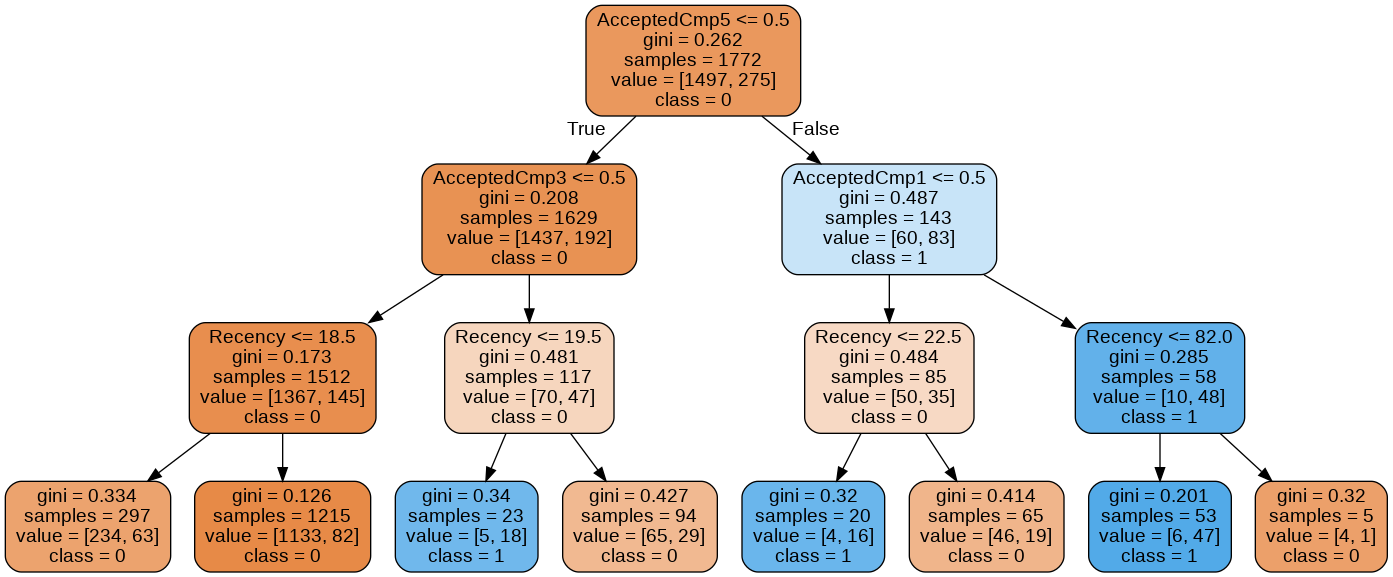

In [48]:
from IPython.display import Image

Image('tree.png')

In [60]:
y_pred_test = tree_model_pipe.predict(X_test)
y_proba_test = tree_model_pipe.predict_proba(X_test)[:,1]

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC: {roc_auc_test:.3f}")

ROC-AUC: 0.744


In [73]:
from pycaret.classification import *

In [79]:
tree_model_pipe[-1]

DecisionTreeClassifier(max_depth=4, random_state=10)

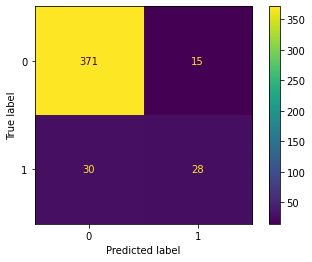

In [61]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_model_pipe, X_test, y_test, values_format='d', display_labels=['0', '1'])

In [69]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_predicted)

array([[361,  25],
       [ 20,  38]])

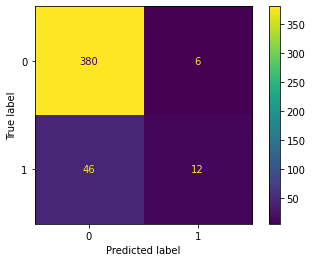

In [49]:


from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model_pipe, X_test, y_test, values_format='d', display_labels=['0', '1'])

In [68]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_predicted)


array([[361,  25],
       [ 20,  38]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effdef7ebd0>],
      dtype=object)

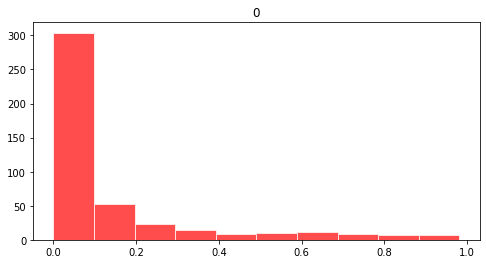

In [64]:
import matplotlib.pyplot as plt

# determinando o pano de fundo (canvas) com tamanho (8,4)
fig, ax = plt.subplots(figsize=(8, 4))

pd.DataFrame(y_predicted).hist(bins=10, color='red', alpha=0.7, 
                 grid=False, edgecolor='white', linewidth=1, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effe7bdfcd0>],
      dtype=object)

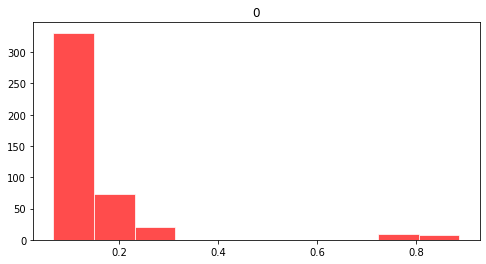

In [51]:
import matplotlib.pyplot as plt

# determinando o pano de fundo (canvas) com tamanho (8,4)
fig, ax = plt.subplots(figsize=(8, 4))

pd.DataFrame(y_predicted).hist(bins=10, color='red', alpha=0.7, 
                 grid=False, edgecolor='white', linewidth=1, ax=ax)



In [67]:
y_predicted = (lr_model_pipe.predict_proba(X_test)[:,1])>0.3
y_predicted

array([False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,

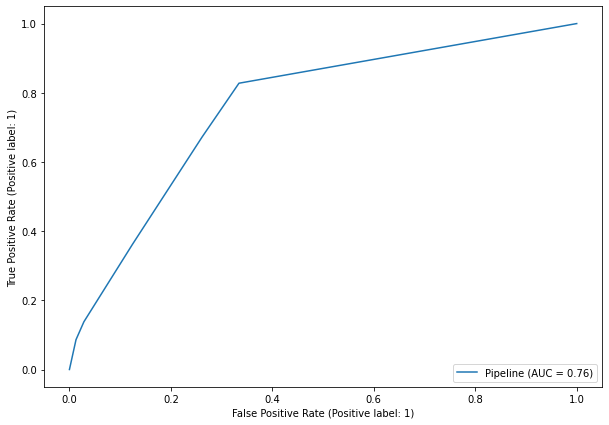

In [45]:
from sklearn.metrics import plot_roc_curve

plt.rcParams['figure.figsize'] = 10, 7

plot_roc_curve(tree_model_pipe, X_test, y_test)

## Parte 2:  Tratamento dos Missing Values

In [ ]:
# Percentual de valores faltantes na coluna 'Occupancy Rate'

(df_airdna['Occupancy Rate'].isnull().sum() / df_airdna['Occupancy Rate'].shape[0])*100

In [ ]:
# Percentual de valores faltantes na coluna 'Revenue (USD)'

(df_airdna['Revenue (USD)'].isnull().sum() / df_airdna['Revenue (USD)'].shape[0])*100

In [ ]:
# Percentual de valores faltantes na coluna 'Revenue (Native)'

(df_airdna['Revenue (Native)'].isnull().sum() / df_airdna['Revenue (Native)'].shape[0])*100

In [ ]:
# Percentual de valores faltantes na coluna 'Revenue (USD)' e 'Revenue (Native)'

(df_airdna[df_airdna['Revenue (USD)'].isnull() & df_airdna['Revenue (Native)'].isnull()].shape[0] / df_airdna['Revenue (Native)'].shape[0])*100

In [ ]:
# Filtrando as linhas com valores faltantes nas colunas 'Occupancy Rate' e 'Revenue (USD)'

df_airdna = df_airdna[df_airdna['Occupancy Rate'].notnull() & df_airdna['Revenue (USD)'].notnull()]
df_airdna.shape[0]

## Parte 3:  Preparação ABT (Regressão e Cluster)

 Para a criação das ABTs, será realizado um filtro de `cidade` `São Paulo` e `ano` `2019` no dataframe `df_airdna` enriquecido com os amenities. A escolha do período foi de 2018-2019 foi devido à questão da pandemia (2020+).
 Na sequência, será calculado a ocupação média no período não por Property ID, mas sim considerando o agrupamento por latitude e longitude.



In [ ]:
# Aplicando filtros na df_airdna

df_airdna = (
    df_airdna
    .query('Active == True')
    .query('City == "São Paulo"')
    .query('`Listing Type` == "Entire home/apt"')
    .query('`Reporting Month` >= "2018-01-01" & `Reporting Month` < "2020-01-01"')
)

df_airdna.shape

In [ ]:
# Percentual de valores faltantes na coluna 'Beedrooms'

(df_airdna['Bedrooms'].isnull().sum() / df_airdna['Bedrooms'].shape[0])*100

In [ ]:
# Filtrando as linhas com valores faltantes na coluna 'Bedrooms'

df_airdna = df_airdna[df_airdna['Bedrooms'].notnull()]
df_airdna.shape

In [ ]:
# Tratamento de Bedrooms

df_airdna = (
    df_airdna
    .assign(Bedrooms_Treated = lambda df: np.where(df['Bedrooms'] == 0, 1, df['Bedrooms']))
)

In [ ]:
# Cálculo da receita por quarto (nº de quartos está sendo utilizado como proxy da área m²)

df_airdna['Revenue (USD)_Bedroom'] = df_airdna['Revenue (USD)'] / df_airdna['Bedrooms_Treated']

In [ ]:
df_airdna.head(5)

In [ ]:
df_airdna.describe()

In [ ]:
# Construindo a ABT - Regressão

df_airdna_regr = df_airdna

In [ ]:
# Construindo a ABT - Cluster

df_airdna_tree = (
    df_airdna
    .groupby(['Latitude','Longitude'])
    .agg(Revenue_Bedroom_12m = ('Revenue (USD)_Bedroom', 'median'),
        Revenue_Bedroom_12mADR = ('Revenue (USD)_Bedroom', 'sum'),
        Reservation_12m = ('Reservation Days', 'sum'),
        Available_Days_12m = ('Available Days', 'sum'),
        Occupancy_12m = ('Occupancy Rate', 'median')
        ) 
    .reset_index()   
)
df_airdna_tree.shape

In [ ]:
# Finalizando a ABT para Cluster com os cálculos da ADR e Revpar

df_airdna_tree['Adr_12m'] = df_airdna_tree['Revenue_Bedroom_12mADR'] / df_airdna_tree['Reservation_12m']
df_airdna_tree['Revpar_12m'] = df_airdna_tree['Adr_12m'] * df_airdna_tree['Occupancy_12m']
#df_airdna_tree['Occupancy_12m'] = df_airdna_tree['Reservation_12m'] / (df_airdna_tree['Reservation_12m'] + df_airdna_tree['Available_Days_12m'])

In [ ]:
df_airdna_tree.sort_values('Occupancy_12m', ascending = False).head(2000)

## Parte 4:  Modelagem - Clusterização

Será modelado uma árvore de decisão com o objetivo de dividir a cidade em partições (divisões nos dados de latitude e longitude) de forma que os imóveis nessas partições tenham baixa dispersão de ocupação.
Esta modelagem está sendo inspirada num trabalho realizado e publicado pela Loft.
- Link:     https://medium.com/loftbr/using-machine-learning-to-find-value-zones-in-são-paulo-37be3841fa4a




### Ocupação

In [ ]:
# Divisão da ABT em variáveis explicativas e target

df_airdna_tree_ocupx = df_airdna_tree[['Latitude','Longitude']]
df_airdna_tree_ocupy = df_airdna_tree['Occupancy_12m']

In [ ]:
df_airdna_tree_ocupx

In [ ]:
df_airdna_tree_ocupy

In [ ]:
# Modelagem da Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

tree_model1 = DecisionTreeRegressor(min_samples_leaf = 30)
tree_model1.fit(df_airdna_tree_ocupx, df_airdna_tree_ocupy)

cluster = tree_model1.apply(df_airdna_tree_ocupx)
occupancy_pred = tree_model1.predict(df_airdna_tree_ocupx)

In [ ]:
ocupx = pd.DataFrame(occupancy_pred)

In [ ]:
ocupx.nunique()

In [ ]:
ocupy = pd.DataFrame(cluster)

In [ ]:
ocupy.nunique()

In [ ]:
df_response_ocup = df_airdna_tree_ocupx 
df_response_ocup['Occupancy_Cluster'] = ocupx
df_response_ocup['Cluster'] = ocupy
df_response_ocup.sort_values('Occupancy_Cluster', ascending = False)

In [ ]:
df_response_ocup = (
    df_response_ocup
    .merge(df_airdna_tree[['Latitude','Longitude','Occupancy_12m']], 
           on = ['Latitude', 'Longitude'], how = 'left', indicator = False)
)

df_response_ocup.shape

In [ ]:
df_response_ocup.head(5)

In [ ]:
df_response_ocup.to_csv(r'df_response_ocup.csv', index = False)

In [ ]:
df_response_ocup = df_response_ocup[df_response_ocup['Occupancy_Cluster'] > 0.7]
df_response_ocup.to_csv(r'df_response_ocupTOP.csv', index = False)

### Receita

In [ ]:
# Divisão da ABT em variáveis explicativas e target

df_airdna_tree_recx = df_airdna_tree[['Latitude','Longitude']]
df_airdna_tree_recy = df_airdna_tree['Revenue_Bedroom_12m'] 

In [ ]:
df_airdna_tree_recx

In [ ]:
df_airdna_tree_recy

In [ ]:
# Modelagem da Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

tree_model2 = DecisionTreeRegressor(min_samples_leaf = 30)
tree_model2.fit(df_airdna_tree_recx, df_airdna_tree_recy)

cluster = tree_model2.apply(df_airdna_tree_recx)
receita_pred = tree_model2.predict(df_airdna_tree_recx)

In [ ]:
recx = pd.DataFrame(receita_pred)

In [ ]:
recx.nunique()

In [ ]:
recy = pd.DataFrame(cluster)

In [ ]:
recy.nunique()

In [ ]:
df_response_rec = df_airdna_tree_recx 
df_response_rec['Revenue_Cluster'] = recx
df_response_rec['Cluster'] = recy
df_response_rec.sort_values('Revenue_Cluster', ascending = False)

In [ ]:
df_response_rec = (
    df_response_rec
    .merge(df_airdna_tree[['Latitude','Longitude','Revenue_Bedroom_12m']], 
           on = ['Latitude', 'Longitude'], how = 'left', indicator = False)
)

df_response_rec.shape

In [ ]:
df_response_rec.head(5)

In [ ]:
df_response_rec.to_csv(r'df_response_rec.csv', index = False)

In [ ]:
df_response_rec = df_response_rec[df_response_rec['Revenue_Cluster'] > 500]
df_response_rec.to_csv(r'df_response_recTOP.csv', index = False)

### Revpar

In [ ]:
# Divisão da ABT em variáveis explicativas e target

df_airdna_tree_revp = df_airdna_tree[['Latitude','Longitude', 'Revpar_12m']]
df_airdna_tree_revp = df_airdna_tree_revp.dropna()

df_airdna_tree_revpx = df_airdna_tree_revp [['Latitude','Longitude']]
df_airdna_tree_revpy = df_airdna_tree_revp ['Revpar_12m'] 

In [ ]:
df_airdna_tree_revp['Revpar_12m'].isnull().sum()

In [ ]:
np.isinf(df_airdna_tree_revp).values.sum()

In [ ]:
df_airdna_tree_revp.describe()

In [ ]:
df_airdna_tree_revpx

In [ ]:
df_airdna_tree_revpy

In [ ]:
# Modelagem da Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

tree_model3 = DecisionTreeRegressor(min_samples_leaf = 50)
tree_model3.fit(df_airdna_tree_revpx, df_airdna_tree_revpy)

cluster = tree_model3.apply(df_airdna_tree_revpx)
revpar_pred = tree_model3.predict(df_airdna_tree_revpx)

In [ ]:
revpx = pd.DataFrame(revpar_pred)

In [ ]:
revpx.nunique()

In [ ]:
revpy = pd.DataFrame(cluster)

In [ ]:
revpy.nunique()

In [ ]:
df_response_revp = df_airdna_tree_revpx 
df_response_revp['Revpar_Cluster'] = revpx
df_response_revp['Cluster'] = revpy
df_response_revp.sort_values('Revpar_Cluster', ascending = False)

In [ ]:
df_response_revp = (
    df_response_revp
    .merge(df_airdna_tree[['Latitude','Longitude','Revpar_12m']], 
           on = ['Latitude', 'Longitude'], how = 'left', indicator = False)
)

df_response_revp.shape

In [ ]:
df_response_revp.head(5)

In [ ]:
df_response_revp.to_csv(r'df_response_revp.csv', index = False)

In [ ]:
df_response_revp = df_response_revp[df_response_revp['Revpar_Cluster'] > 50]
df_response_revp.to_csv(r'df_response_revpTOP.csv', index = False)

## Parte 5:  Modelagem Regressão - Força das Variáveis


In [ ]:
# Importanto o Pycaret e verificando a versão

import pycaret
pycaret.__version__

In [ ]:
df_airdna_regr.shape

In [ ]:
df_airdna_regr.info(verbose = True)

In [ ]:
# Cálculo de novas métricas

df_airdna_regr['RevPar (USD)_Bedroom'] = df_airdna_regr['Revenue (USD)_Bedroom'] / (df_airdna_regr['Reservation Days'] + df_airdna_regr['Available Days']+ df_airdna_regr['Blocked Days'])
df_airdna_regr['Not Blocked Days'] = df_airdna_regr['Reservation Days'] + df_airdna_regr['Available Days']
df_airdna_regr['Length of Stay'] = df_airdna_regr['Reservation Days'] / df_airdna_regr['Number of Reservations']

In [ ]:
# Retirando colunas da df_airdna_regr que não vão entrar no modelo

df_airdna_regr = df_airdna_regr.drop(['Revenue (USD)','Revenue (Native)','ADR (USD)','ADR (Native)','Zipcode',
                                        'Bedrooms_Treated', 'Metropolitan Statistical Area','Scraped During Month','Currency Native',
                                        'Airbnb Property ID','Airbnb Host ID','HomeAway Property ID','HomeAway Property Manager', 'Blocked Days',
                                        'Available Days','Number of Reservations', 'Revenue (USD)_Bedroom', 'Occupancy Rate'], axis = 1)


In [ ]:
# Filtrando linhas com dados faltantes

df_airdna_regr = df_airdna_regr.dropna()

In [ ]:
df_airdna_regr.shape

In [ ]:
df_airdna_regr.info(verbose = True)

In [ ]:

df_airdna_regr['Reporting Month'] = pd.to_datetime(df_airdna_regr['Reporting Month'])

(
    df_airdna_regr
    .assign(year = df_airdna_regr['Reporting Month'].dt.year)
    .assign(month = df_airdna_regr['Reporting Month'].dt.month))

In [ ]:
df_airdna_regr = df_airdna_regr.drop('Reporting Month', axis = 1)

In [ ]:
# Identificando as variáveis do modelo

target = 'RevPar (USD)_Bedroom' 
key_vars = ['Property ID']
cat_vars = df_airdna_regr.select_dtypes(include = 'object').columns.to_list()
num_vars = [col for col in df_airdna_regr.columns if col not in cat_vars + key_vars + [target]]

In [ ]:
from sklearn.model_selection import train_test_split

df_airdna_regr, oot = train_test_split(df_airdna_regr, test_size = 0.2)

In [ ]:
# Importando todas as funções do módulo regressão da biblioteca Pycaret

from pycaret.regression import *

exp_setup = setup(data = df_airdna_regr, target = target, train_size = 0.8,
                  ignore_features = key_vars, categorical_features = cat_vars, numeric_features = num_vars,
                  session_id = 42, normalize = True, remove_outliers = True, feature_selection = True)

In [ ]:
# A função compare_models() irá treinar vários modelos, avaliá-los usando cross-validation e retornar o melhor modelo

compare_models(fold = 10, sort = 'MAPE')

In [ ]:
# O melhor modelo encontrado foi a random forest
randf = create_model('rf', fold = 10)

In [ ]:
# Verificando os hiperparâmetros do modelo
randf

In [ ]:
# construindo o shap values
import shap

X_train = get_config('X_train')
X_test = get_config('X_test')
explainer = shap.KernelExplainer(randf.predict, shap.sample(X_train, 10))
shap_values = explainer.shap_values(X_test, nsamples = 100)
shap.summary_plot(shap_values, X_test)

In [ ]:
interpret_model(lgbm)

In [ ]:
plot_model(randf, plot = 'residuals')

In [ ]:
plot_model(randf, plot = 'error')

In [ ]:
lr_final = finalize_model(randf)

In [ ]:
predictions = predict_model(lr_final, data = oot)

In [ ]:
predictions

In [ ]:
predictions['Abs_delta_percentual'].mean(), predictions['Abs_delta_percentual'].median()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

predictions.plot(x ='RevPar (USD)_Bedroom', y = 'Abs_delta_percentual', kind = 'scatter', ax=ax)

In [ ]:

predictions['Abs_delta_percentual'] =  ((predictions['Label'] - predictions['RevPar (USD)_Bedroom'])*100/predictions['RevPar (USD)_Bedroom']).abs() 


In [ ]:
predictions

In [ ]:
df_analise = (
    predictions
    .groupby(['Neighborhood'])
    .agg(mape = ('Abs_delta_percentual', 'median')) 
    .reset_index()   
)
df_analise 

In [ ]:

pd.set_option('display.max_rows', 100)
df_analise  = df_analise .sort_values('mape', ascending = True) 
df_analise

In [ ]:
get_config('X_test')

In [ ]:
get_config('y_test')

In [ ]:
get_config('y_test')

In [ ]:
get_config('data_before_preprocess')

In [ ]:
x = predict_model(lgbm)

In [ ]:
x.info(verbose = True)

In [ ]:
sup = df_airdna_regr[num_vars]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(40, 20))
sns.heatmap(sup.corr().round(2), annot=True);